In [2]:
import pydicom 
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2

In [3]:

def load_dicom_series(dicom_dir):
    """
    Loads a DICOM series from a directory and return a 3D numpy array.
    """
    # list files
    dicom_files = sorted([os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith('.DCM')])
    
    # read dcm 
    slices = [pydicom.dcmread(dcm) for dcm in dicom_files]
    slices.sort(key=lambda x: int(x.InstanceNumber))  # Sort by slice order
    
    # stack and make into 3d volume
    volume = np.stack([s.pixel_array for s in slices], axis=-1)
    return volume


def plot_slice(volume, x=None, y=None, z=None):
    if x is not None:
        slice_2d = volume[x, :, :]
        title = f'Slice at X={x}'
    elif y is not None:
        slice_2d = volume[:, y, :]
        title = f'Slice at Y={y}'
    elif z is not None:
        slice_2d = volume[:, :, z]
        title = f'Slice at Z={z}'
    else:
        raise ValueError("One of x, y, or z must be specified")
    
    return slice_2d, title

In [4]:
dicom_dir = '../../data/imrh_114a/imoco_recon_0/'
dicom_load = load_dicom_series(dicom_dir)

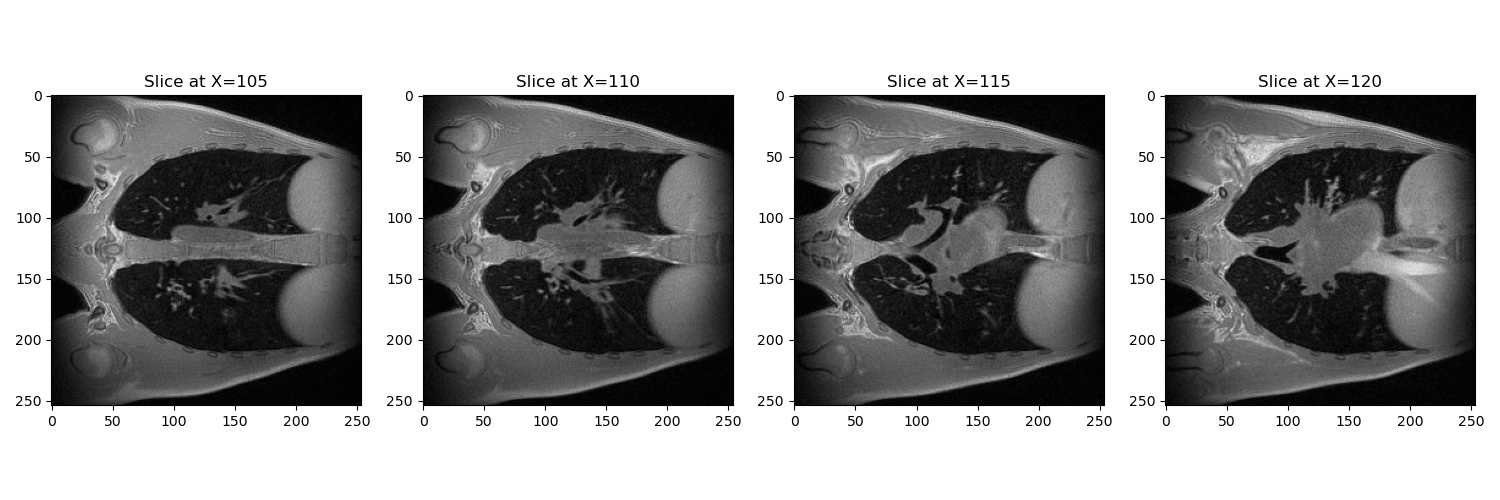

In [6]:

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for ax, x_coord in zip(axs,np.arange(105,125,5)): 
    slice_2d, title = plot_slice(dicom_load, x=x_coord)
    ax.imshow(slice_2d, cmap='gray')
    ax.set_title(title)

plt.tight_layout()
plt.show()

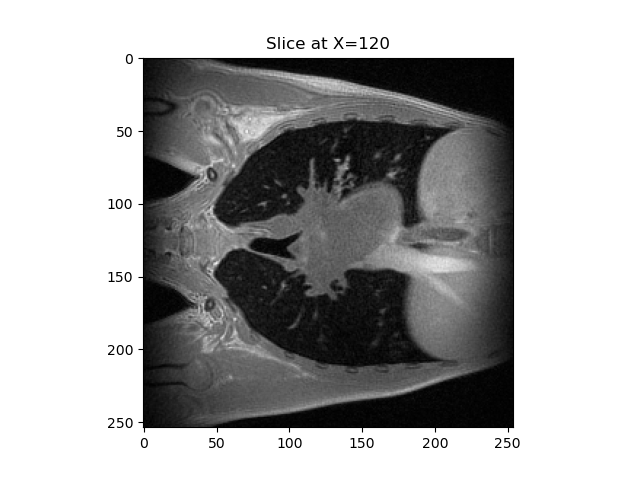

In [5]:
slice_2d, title = plot_slice(dicom_load, x=120)
plt.imshow(slice_2d, cmap='gray')
plt.title(title)
plt.show()

In [19]:
plt.imsave('../../data/imrh_114a/slices/lammy0_slice120.png',slice_2d, cmap='gray')

In [7]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

from mpl_interactions import image_segmenter

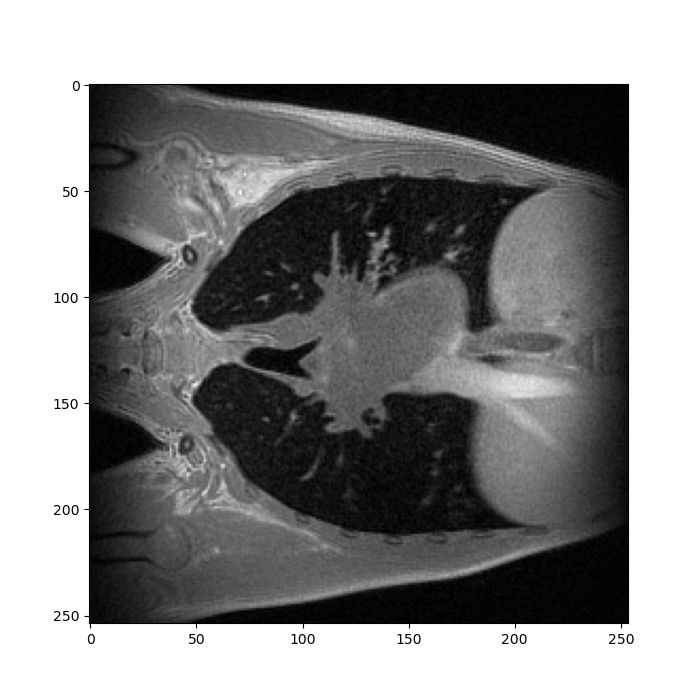

In [10]:
segmenter = image_segmenter(slice_2d, mask_colors="red", mask_alpha=0.76, figsize=(7, 7), cmap='gray')
display(segmenter)

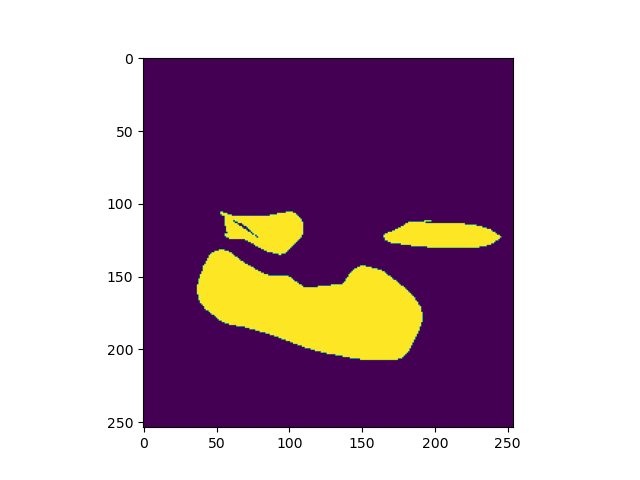

In [13]:
plt.figure()
plt.imshow(segmenter.mask)